In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro,normaltest,anderson,boxcox,skew
import smogn

In [3]:
data = pd.read_csv("fepB_complete.csv")
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260509 entries, 0 to 260508
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SeqID       260509 non-null  object 
 1   R1          260509 non-null  float64
 2   R2          260509 non-null  float64
 3   R3          260509 non-null  float64
 4   R4          260509 non-null  float64
 5   R5          260509 non-null  float64
 6   R6          260509 non-null  float64
 7   R7          260509 non-null  float64
 8   R8          260509 non-null  float64
 9   dG_pairing  260509 non-null  float64
 10  dG_folding  260509 non-null  float64
dtypes: float64(10), object(1)
memory usage: 21.9+ MB


In [4]:
def target_var(data):
    y = data[['R1','R2','R3','R4','R5','R6','R7','R8']].copy()
    flu_level = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
    
    y['total'] = y.sum(axis=1)
    y = y[['R1','R2','R3','R4','R5','R6','R7','R8']].div(y.total,axis=0)
    y *= flu_level
    y['weighted_mean'] = y.sum(axis=1)  
    
    return y['weighted_mean']


In [6]:
y = target_var(data)

In [7]:
df = data[['SeqID','dG_pairing','dG_folding']].copy()
df['weighted'] = y

### Original

0.797


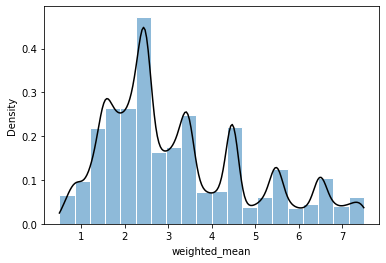

In [8]:
ax = sns.histplot(data=y,bins=20,stat='density',kde=True,edgecolor='white')
ax.get_lines()[0].set_color('black')
print(np.round(skew(y),4))

### Log Transformation

0.0953


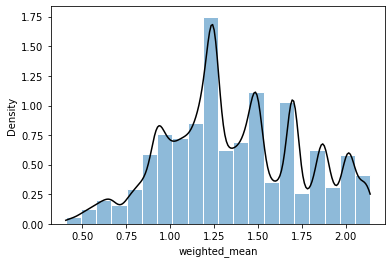

In [9]:
lg_target = np.log1p(y)
ax = sns.histplot(data=lg_target,bins=20,stat='density',kde=True,edgecolor='white')
ax.get_lines()[0].set_color('black')
print(np.round(skew(lg_target),4))

### Square Root Transformation

0.3303


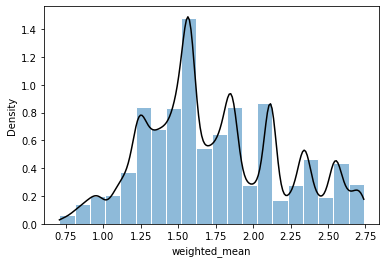

In [10]:
sqrrt_target = y**(1/2)
ax = sns.histplot(data=sqrrt_target,bins=20,stat='density',kde=True,edgecolor='white')
ax.get_lines()[0].set_color('black')
print(np.round(skew(sqrrt_target),4))

### Boxcox Transformation

-0.016


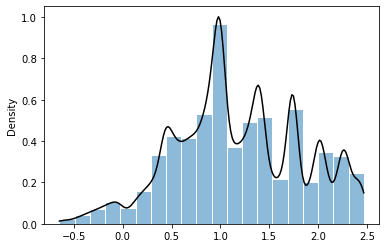

In [11]:
bcx_target,lam = boxcox(y)
ax = sns.histplot(data=bcx_target,bins=20,stat='density',kde=True,edgecolor='white')
ax.get_lines()[0].set_color('black')
print(np.round(skew(bcx_target),4))